## Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import Callback
import keras.backend as K

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from utils.keras_OneCycle import OneCycle

Using TensorFlow backend.


### Load the dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [3]:
num_classes = 10
batch_size = 128
epochs=5

In [4]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Create a Network

The loss function has to be **categorical_crossentropy** since we deal with categorical labels.
The same goes for the last activation which has to be **softmax** since we have more than two classes (sigmoid would be fine for two classes).

In [5]:
def Net():

    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

    return model

In [6]:
model = Net()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


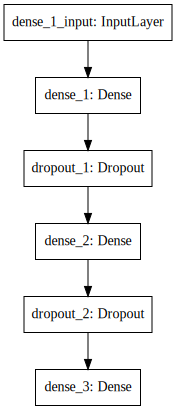

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Cyclical Learning Rate and Momentum

In [8]:
sched = OneCycle(min_lr=7e-3, max_lr=7e-2, min_mtm = 0.85, max_mtm = 0.95, annealing_stage=0.1, annealing_rate=0.01,
          training_iterations=np.ceil(((X_train.shape[0]*epochs)/(batch_size))))
model = Net()

In [9]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), callbacks=[sched])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 102us/step - loss: 0.4248 - acc: 0.8735 - val_loss: 0.1668 - val_acc: 0.9504
Epoch 2/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.1464 - acc: 0.9560 - val_loss: 0.1022 - val_acc: 0.9670
Epoch 3/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.0984 - acc: 0.9694 - val_loss: 0.0738 - val_acc: 0.9767
Epoch 4/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.0702 - acc: 0.9778 - val_loss: 0.0643 - val_acc: 0.9802
Epoch 5/5
60000/60000 [==============================] - 6s 101us/step - loss: 0.0471 - acc: 0.9855 - val_loss: 0.0560 - val_acc: 0.9824


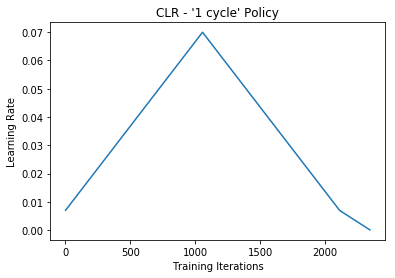

In [10]:
sched.plot_lr()

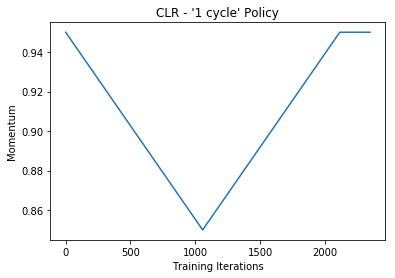

In [11]:
sched.plot_mtm()